# DoRothEA: resource of Transcription Factor regulons

## Introduction

DoRothEA is a comprehensive resource containing a curated collection of transcription factors (TFs) and its transcriptional targets. The set of genes (targets) regulated by a specific TF is known as regulon. DoRothEA can be understood as a gene regulatory network (GRN) containing many regulons.

Here is how to get access to DoRothEA regulons:

In [1]:
# Load all required packages for this notebook
import pandas as pd
import numpy as np
import dorothea
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import igraph as ig

In [2]:
dorothea_hs = dorothea.load_regulons(
    organism='Human', # If working with mouse, set to Mouse
    commercial=False # If non-academia, set to True
)

dorothea_hs

tf,ADNP,ADNP2,AEBP2,AHR,AHRR,AIRE,ALX1,ALX3,ALX4,AR,...,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN9,ZXDA,ZXDB,ZXDC
target,,,,,,,,,,,,,,,,,,,,,
7SK.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1BG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1CF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A2ML1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYG11B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Each TF (columns), targets a set of genes (rows). Non zero values represent an interaction between a target gene and a TF. Depending on the type of interaction, there will be positive (+1) and negative (-1) interactions. A positive edge means that if a given TF is active, its target will have high levels of gene expression. On the contrary, a negative edge means that if a given TF is active, its target will not show gene expression.

Here is a visual representation of a subset of TFs (red nodes) and target genes (green nodes). Green edges are positive interactions and red edges are negative:

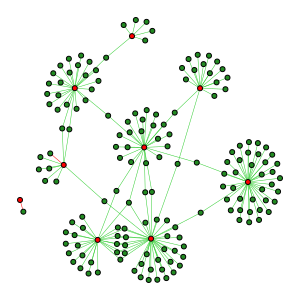

In [3]:
# To explore more visualizations change these parameters
num_tfs = 10
num_genes = 1000
#

sub_doro = dorothea_hs.values[:num_genes,:num_tfs]
sub_doro = sub_doro[np.any(sub_doro != 0, axis=1)]
sub_doro = sub_doro[:, np.any(sub_doro != 0, axis=0)]
num_genes, num_tfs = sub_doro.shape
adj_m = np.vstack([np.zeros((sub_doro.shape[1], sub_doro.shape[1])), sub_doro])
adj_m = np.hstack([adj_m, np.zeros((adj_m.shape[0],adj_m.shape[0]-adj_m.shape[1]))])
g = ig.Graph.Adjacency((np.abs(adj_m) > 0).tolist())
g.vs['color'] = (['red'] * num_tfs) + (['forestgreen'] * num_genes)
weights = adj_m[np.where(adj_m)]
g.es['color'] = ['limegreen' if w > 0 else 'red' for w in weights]
ig.plot(g, layout="fr", vertex_size=5, edge_arrow_size=0, edge_width=0.5, bbox=(300,300))

Looking at the network, it is clear that most of DoRothEA interactions are positive:

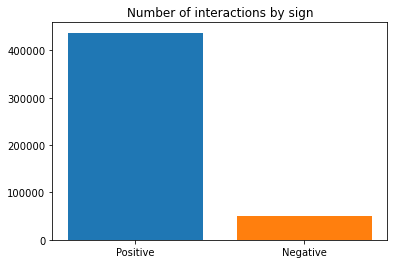

In [4]:
num_pos = np.sum(dorothea_hs.values == 1)
num_neg = np.sum(dorothea_hs.values == -1)

fig, axes = plt.subplots(facecolor='white')
axes.set_title('Number of interactions by sign')
axes.bar('Positive', num_pos)
axes.bar('Negative', num_neg)

plt.show()

## Confidence levels

DoRothEA’s regulons were gathered from different types of evidence. Each TF-target interaction is defined by a confidence level based on the number of supporting evidence. The confidence levels ranges from A (highest confidence) to E (lowest confidence) (Garcia-Alonso et al. 2019).

Let's compare the different confidence interactions:

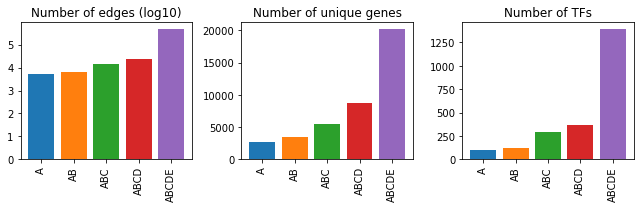

In [5]:
levels = [['A'], ['A', 'B'], ['A', 'B', 'C'], ['A', 'B', 'C', 'D'], ['A', 'B', 'C', 'D', 'E']]

fig, axes = plt.subplots(1,3, figsize=(9,3), tight_layout=True, facecolor='white')
axes = axes.flatten()

for level in levels:
    doro = dorothea.load_regulons(
        levels=level # To specify a confidence level pass a list of levels. E.g. ['A']
    )
    num_edges = np.sum(np.abs(doro.values))
    num_genes, num_tfs = doro.shape
    label = ''.join(level)
    
    axes[0].set_title('Number of edges (log10)')
    axes[0].bar(label, np.log10(num_edges))
    axes[0].tick_params(axis='x', rotation=90)
    
    axes[1].set_title('Number of unique genes')
    axes[1].bar(label, num_genes)
    axes[1].tick_params(axis='x', rotation=90)
    
    axes[2].set_title('Number of TFs')
    axes[2].bar(label, num_tfs)
    axes[2].tick_params(axis='x', rotation=90)

High confidence interactions are very reliable but have low coverage of genes and TFs. On the other hand, low confidence interactions are not as reliable but have a high coverage of genes and TFs.
It will always depend on the application, but most of the times a good compromise would be to select medium confidence interactions (ABC) for the best trade-off between coverage and reliability.

## Footprint-based enrichment analysis 

Classic enrichment analysis focuses on the levels of expression of the elements of a given biological process (for instance TF expression) to estimate its activity. In contrast, footprint-based enrichment analysis instead estimates activities using molecular readouts considered to be downstream. Thus, expression of targets can be inferred as a more robust proxy of the TF's activity (Dugourd and Saez-Rodriguez 2019).


Following this idea, we use DoRothEA regulons to estimate TF activities using footprint-based enrichment analysis from gene expression profiles. DoRothEA regulons can be coupled with any footprint-based statistic to compute TF activities. In this implementation we use the normalized mean of expression of the target genes as statistic but we could have used any other. If you are interested in knowing more footprint-based algorithms you can check [DecoupleR](https://github.com/saezlab/decoupleR), an R package were we systematically evaluated the performance of different GRN with different statistics in bulk RNA-seq.

## Toy example

Here is a toy example for just for visualizing porpuses, for proper usage of the package see other notebooks. 


We will generate expression for 10 genes for one sample and we will compute the activites of 3 TFs.

In [6]:
genes_lst = ['STMN1', 'CTNNB1', 'SPRY1', 'IL6', 'MMP9', 'SMARCA4', 'CISH', 'IL1B', 'CCL3', 'OASL']
expr = np.array([50, 30, 10, 500, 400, 60, 50, 270, 260, 100])
tfs_lst = ['EGR1', 'NFKB1', 'STAT1']

Let's load DoRothEA regulons and trim them to fit our expression matrix:

In [7]:
regulons = dorothea.load_regulons(['A']).loc[genes_lst, tfs_lst]
regulons

tf,EGR1,NFKB1,STAT1
target,,,
STMN1,1.0,0.0,0.0
CTNNB1,1.0,0.0,0.0
SPRY1,1.0,0.0,0.0
IL6,-1.0,1.0,-1.0
MMP9,0.0,1.0,-1.0
SMARCA4,0.0,0.0,1.0
CISH,0.0,0.0,1.0
IL1B,0.0,1.0,1.0
CCL3,0.0,1.0,1.0


Then we compute the activities for the TF and plot them in a bipartite graph.

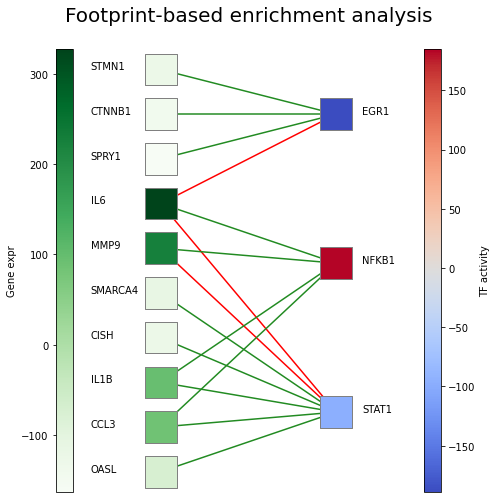

In [8]:
# Create coords for plots
g_coords = np.array([np.repeat(0, len(genes_lst)), np.arange(0, -len(genes_lst), -1)]).T
t_coords = np.array([np.repeat(1, len(tfs_lst)), np.arange(-1, -len(genes_lst), -len(genes_lst)/len(tfs_lst))]).T

# Center expression
expr = expr - np.mean(expr)

# Calculate TF activities
tf_act = expr.T.dot(regulons.values) / np.sum(np.abs(regulons.values), axis=0)

# Order edges
pos_edg = []
neg_edg = []
for i,gene in enumerate(regulons.values):
    for j,tf in enumerate(gene):
        edg = [g_coords[i][1], t_coords[j][1]]
        if tf > 0:
            pos_edg.append(edg)
        elif tf < 0:
            neg_edg.append(edg)
            
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot graph
fig, ax = plt.subplots(1,1, figsize=(7,7), facecolor='white', tight_layout=True)
ax.set_title('Footprint-based enrichment analysis', fontsize=20, y=1.05)
ax.plot(np.array(neg_edg).T, color='red', zorder=1)
ax.plot(np.array(pos_edg).T, color='forestgreen', zorder=1)
gene_plot = ax.scatter(g_coords[:,0], g_coords[:,1], marker='s', s=1000, c=expr, cmap='Greens', zorder=2, edgecolor='gray')
tf_plot = ax.scatter(t_coords[:,0], t_coords[:,1], marker='s', s=1000, c=tf_act, cmap='coolwarm', zorder=2, edgecolor='gray')
ax.set_xlim(-0.5, 1.5)

# Add gene/tf labels
for i,g in enumerate(genes_lst):
    ax.text(g_coords[i][0]-0.4, g_coords[i][1], g)
for i,t in enumerate(tfs_lst):
    ax.text(t_coords[i][0]+0.15, t_coords[i][1], t)

# Format color bars
divider = make_axes_locatable(ax)
cax = divider.append_axes('left', size='5%', pad=0)
fig.colorbar(gene_plot,cax,orientation='vertical', label='Gene expr')
cax.yaxis.set_label_position('left')
cax.yaxis.set_ticks_position('left')
cax = divider.append_axes('right', size='5%', pad=0)
fig.colorbar(tf_plot,cax,orientation='vertical', label='TF activity')
ax.axis('off')
plt.show()

On the left in green there are the levels of expression of our 10 genes. On the right in blue/red there are the TF activities. Each TF is connected by edges to a set of target genes according to the annotated DoRothEA's regulons. Green edges are positive interactions and red are negative.

Just by looking at the gene expression we can see that there are some genes that are coordinated (they share high or low expression profiles). However, if there are more than 10 genes it becomes hard to interpret what is going on by just looking at gene expression. By using footprint-based enrichment analysis with DoRothEA's regulons, we can summarize these regulation events into TF activities. They can be understood as a prior knowledge based dimensionality reduction. 

In this specific toy example, NFKB1 appears to be activated since all of its target genes have high gene expression. On the other hand, STAT1 and EGR1 seem to be less active since their negative targets have high expression while their positive targets are lowly expressed.